![Pipline ML](../img/pipline-ml-approach-crisp-dm.png)<br>

<div class="text-center">Typical Machine Learning Pipeline with CRISP-DM Approach</div>
<div class="text-center">(Sarkar, et. al., 2018)</div>

# 1. Business Understanding
Tujuan dari data mining ini adalah: <br>
<ul>
    <li>Mengetahui algoritme machine learning terbaik untuk klasifikasi diagnosis kanker payudara</li>
    <li>Algoritme machine learning yang digunakan untuk perbandingan adalah k-NN, Naive Bayes, dan Decision Tree</li>
</ul>

# 2. Data Understanding
<ul>
    <li>Dataset yang digunakan adalah breast-cancer-wdbc.csv</li>
    <li>Dataset disimpan dalam folder datasets pada repository ini</li>
    <li>Atau jika ingin melihat sumber dataset, dapat didownload melalui link <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)</a></li>
</ul>

# 3. Data Preparation

###  Load Dataset

In [1]:
import pandas as pd

In [2]:
bc = pd.read_csv('../datasets/breast-cancer-wdbc.csv')

In [3]:
# menampilkan lima data teratas
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Preprocessing

In [4]:
#hilangkan atribut id dan Unnamed: 32
bc.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# menampilkan lima data teratas setelah atribut id dihilangkan
bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# melihat dimensi dataset
bc.shape

(569, 31)

In [6]:
# melihat nama kolom
bc.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# cek apakah terdapat data missing value setiap atribut
bc.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# melihat tipe data setiap atribut
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

### Exploratory Data Analysis (EDA)

In [9]:
# korelasi antar atribut
korelasi = bc.corr()
korelasi.shape

(30, 30)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

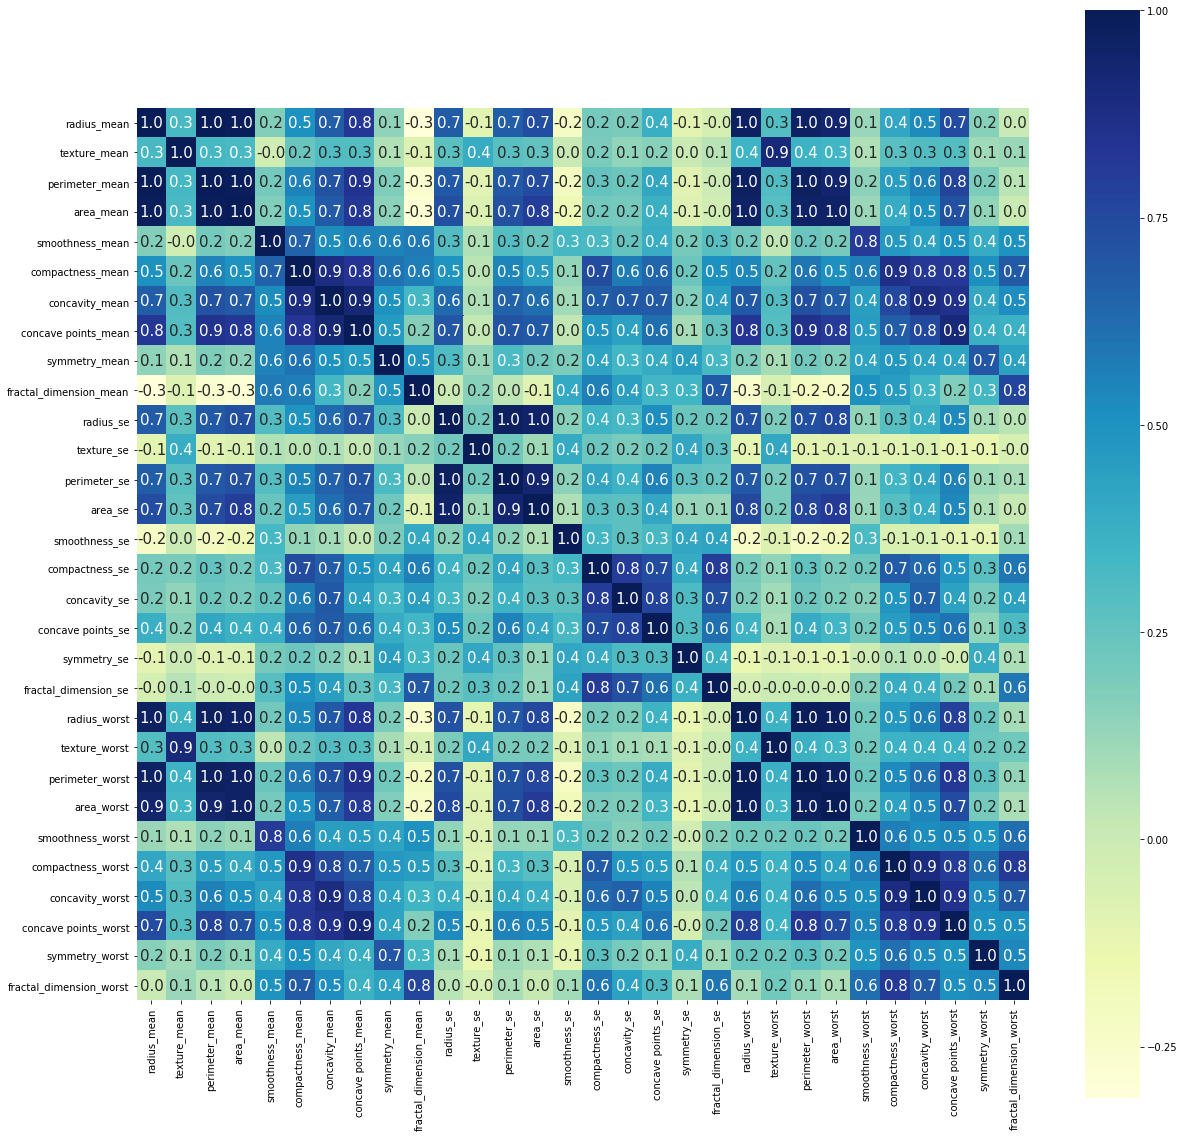

In [11]:
# Plotting heatmap berdasarkan korelasi antar atribut
plt.figure(figsize=(20,20))
sns.heatmap(korelasi, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')
plt.show()

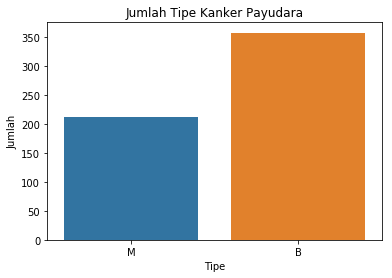

In [12]:
# Analisis atribut spesial (class/target)
plt.title('Jumlah Tipe Kanker Payudara')
sns.countplot(bc['diagnosis'])
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

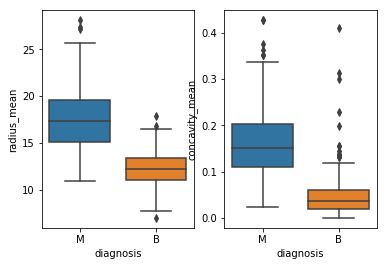

In [15]:
# Plotting korelasi antara atribut diagnosis and radius_mean
# Plotting korelasi antara atribut diagnosis and concavity_mean

# plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=bc)

plt.subplot(1,2,2)
sns.boxplot(x="diagnosis", y="concavity_mean", data=bc)
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


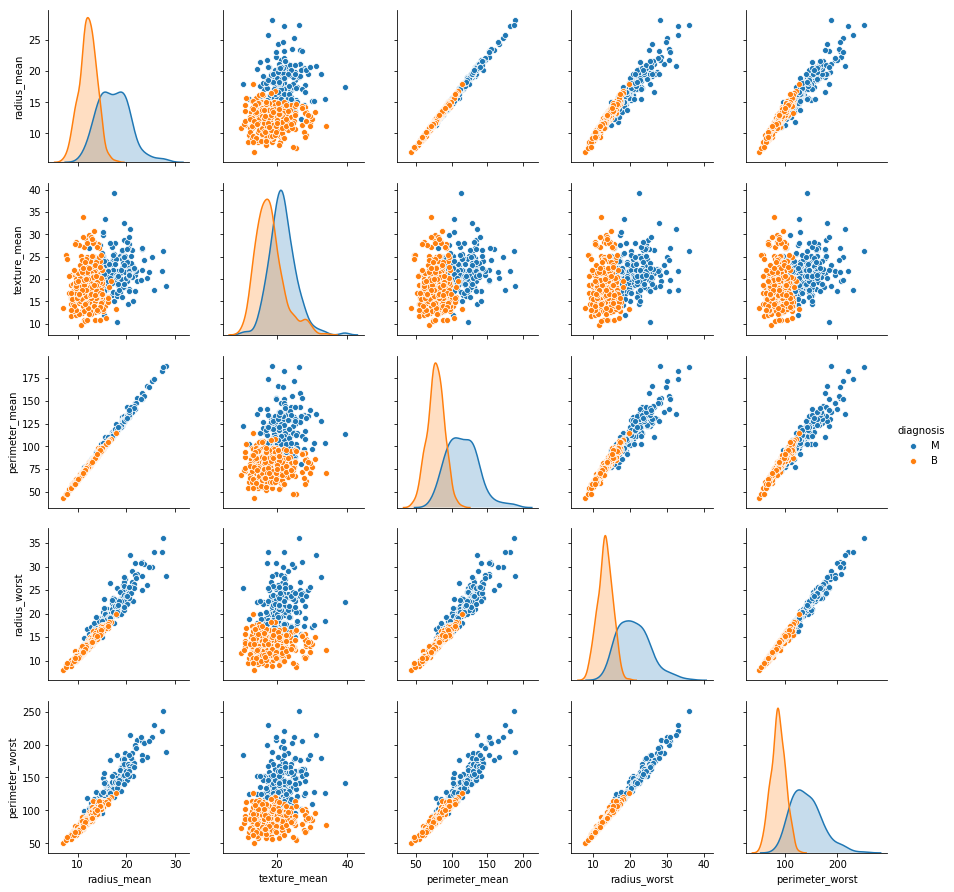

In [16]:
# plotting bivariate relation antara setiap pasangan atribut dengan hue='diagnosis'
sns.pairplot(bc, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()

# 4. Modeling

In [17]:
# modul untuk membagi dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split
# modul untuk menghitung performa model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# Pisahkan antara atribut biasa dengan atribut spesial (class)
x = bc.drop(columns='diagnosis')
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# atribut spesial (class/target)
y = bc['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [20]:
# split data menjadi data training dan data testing, dengan proporsi 70% data training, dan 30% data testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

print('data training:')
print(xtrain.shape)
print(ytrain.shape)
print('----------------')
print('data testing:')
print(xtest.shape)
print(ytest.shape)

data training:
(398, 30)
(398,)
----------------
data testing:
(171, 30)
(171,)


### Algoritme k-NN

In [21]:
# import library k-NN
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# gunakan algoritme k-NN, dengan nilai k adalah 5, perhitungan jarak euclidean (p=2)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='euclidean')

# lakukan training 
knn.fit(xtrain, ytrain)

# lakukan klasifikasi dengan algoritme k-NN
ypred = knn.predict(xtest)

In [23]:
# hitung akurasi
print(accuracy_score(ytest, ypred))

0.9473684210526315


In [24]:
# tampilkan confusion matrix
print(confusion_matrix(ytest, ypred))

[[103   5]
 [  4  59]]


### Algoritme Naive Bayes

In [25]:
# import library Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB

In [26]:
# gunakan algoritme Navie Bayes Gaussian
nb = GaussianNB()

# lakukan training
nb.fit(xtrain, ytrain)

# lakukan klasifikasi dengan algoritme NB
ypred = nb.predict(xtest)

In [27]:
print(accuracy_score(ytest, ypred))

0.9239766081871345


### Algoritme Decision Tree

In [28]:
# import library Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

In [30]:
print(accuracy_score(ytest, ypred))

0.9122807017543859


# 5. Evaluation

### Komparasi Algoritme k-NN, Naive Bayes, dan Decision Tree

In [32]:
models = [knn, nb, dt]
nilai_akurasi = []
for model in models:
    ypred = model.predict(xtest)
    akurasi = accuracy_score(ytest, ypred)
    nilai_akurasi.append(akurasi)
print(nilai_akurasi)

[0.9473684210526315, 0.9239766081871345, 0.9122807017543859]


In [33]:
import matplotlib.pyplot as plt 

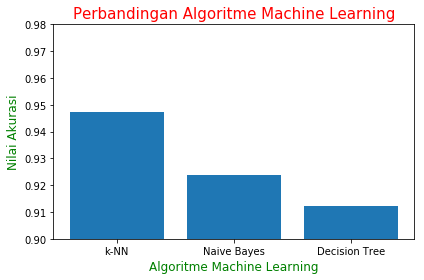

In [34]:
plt.bar(['k-NN', 'Naive Bayes', 'Decision Tree'],nilai_akurasi)
plt.ylim(0.90, 0.98)
plt.title("Perbandingan Algoritme Machine Learning", fontsize=15, color='r')
plt.xlabel('Algoritme Machine Learning', fontsize=12, color='g')
plt.ylabel('Nilai Akurasi', fontsize=12, color='g')
plt.tight_layout()
plt.show()

<ul>
<li>
  Dari ketiga algoritme di atas terlihat bahwa algoritme k-NN menghasilkan nilai akurasi tertinggi untuk klasifikasi diagnosis penyakit kanker payudara
</li>
</ul>

# 6. Deployment

<ul>
    <li>Akan menerapkan <b>algoritme k-NN</b> untuk klasifikasi diagnosis penyakit kanker payudara </li>    
</ul>